In [1]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt

In [2]:
def l_small(t: float, b: float, c: float) -> float:
    return np.exp(-((t - b) ** 2) / (2 * c)) / np.sqrt(2 * np.pi * c)

In [3]:
def trapez(f: Callable[[float], float], a: float, b: float, eps: float) -> float:
    old_i = 0
    new_i = old_i + 2 * eps

    n = 1
    while abs(new_i - old_i) > eps:
        old_i = new_i
        h = (b - a) / n
        s = -(f(a) + f(b)) / 2

        i = 0
        while i <= n:
            s += f(a + i * h)

            i += 1
        new_i = s * h

        n *= 2

    return new_i

In [4]:
def l_big(a: float, t: float, b: float, c: float):
    return trapez(f=lambda _t: l_small(_t, b, c), a=max(0, t - a), b=t, eps=0.001)

In [5]:
t_list = np.arange(0, 10, 0.01)
b = 5
c = 1
a_list: list[float] = [0.1, 0.3, 0.5, 0.7, 1, 1.0455, 2, 3]

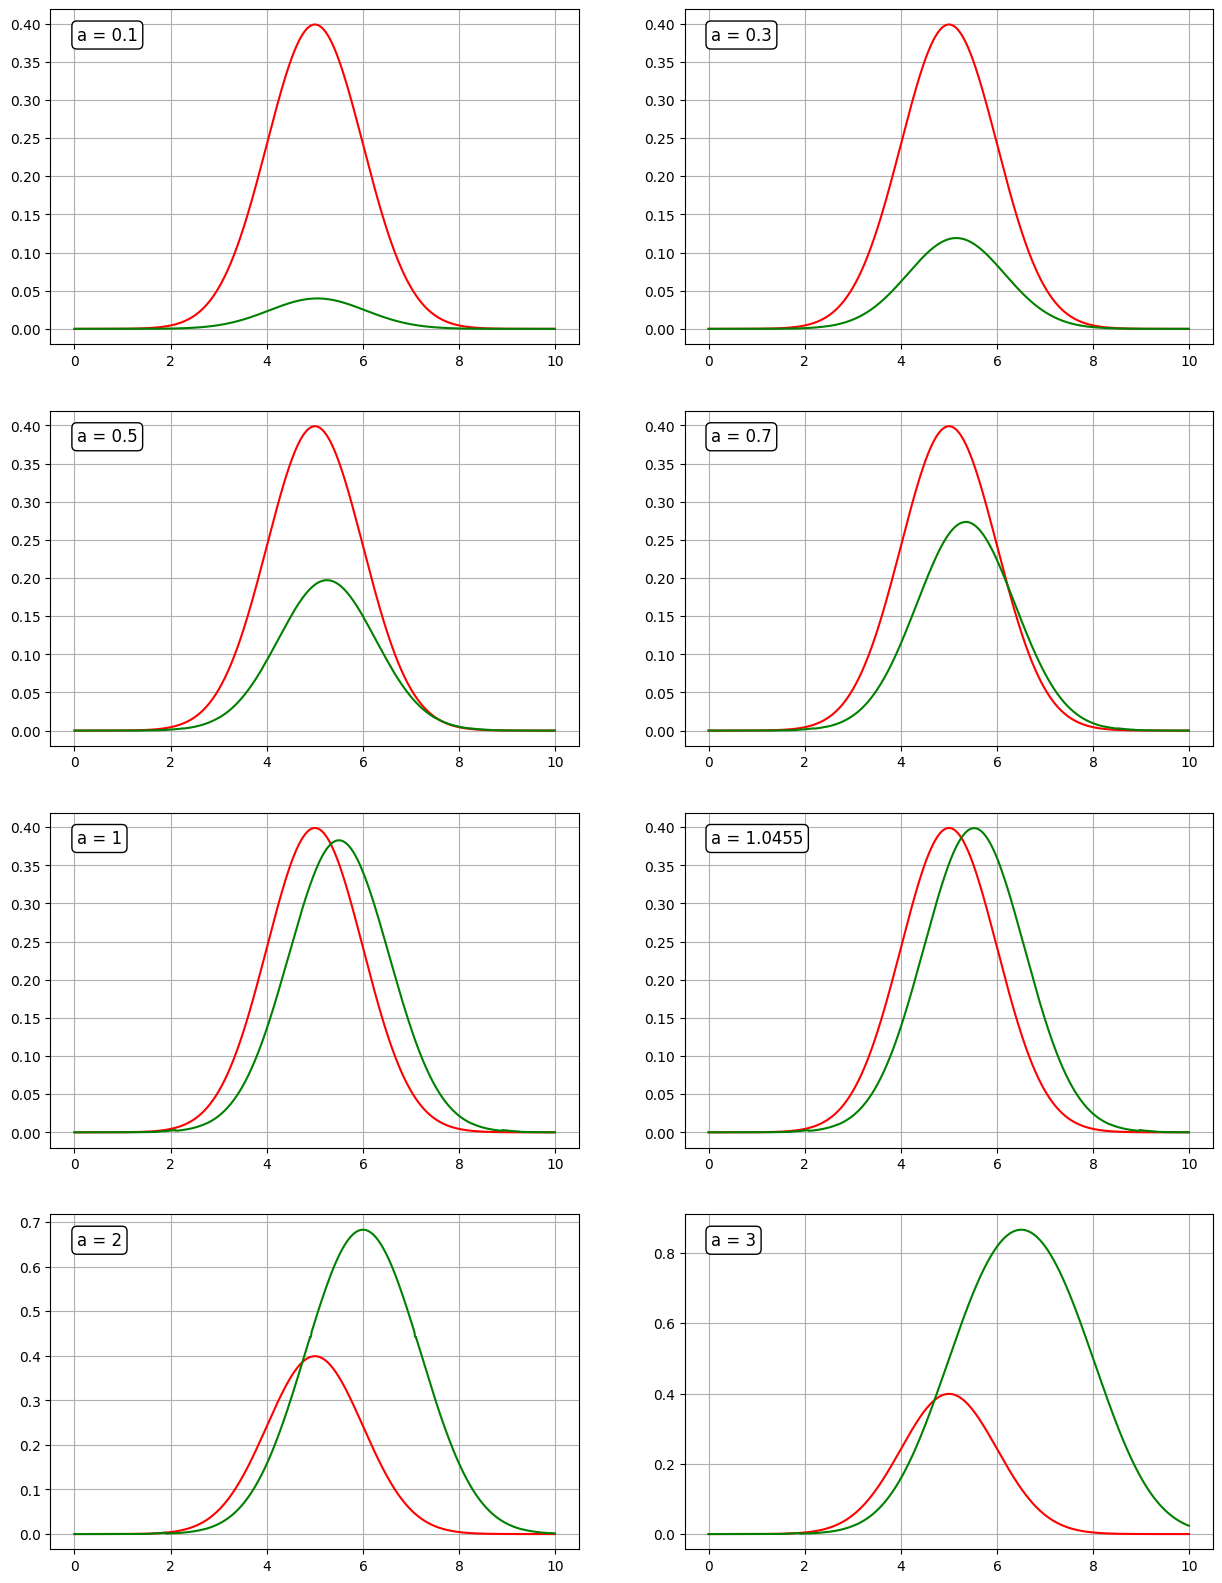

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))


for i, a in enumerate(a_list):
    axs[i // 2, i % 2].plot(
        t_list,
        np.vectorize(lambda t: l_small(t, b, c))(t_list),
        color="red",
    )
    axs[i // 2, i % 2].plot(
        t_list, np.vectorize(lambda t: l_big(a, t, b, c))(t_list), color="green"
    )
    # axs[i // 2, i % 2].legend(["l_small", "l_big"], loc="upper right")
    axs[i // 2, i % 2].annotate(
        f"a = {a}",
        xy=(0.05, 0.95),
        xycoords="axes fraction",
        fontsize=12,
        ha="left",
        va="top",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
    )
    axs[i // 2, i % 2].grid()